In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Start with a simple 7 x 7 test input

topography = np.array([[1,1,0,-1,1,1,1],
                         [1,1,2,3,4,3,1],
                         [2,3,1,0,3,4,3],
                         [1,0,1,1,3,2,3],
                         [0,-1,-2,1,3,3,2],
                         [2,3,-1,1,3,0,-1],
                         [2,3,0,1,3,-1,0]])


In [39]:
def apply_sea_level(sealevel: int, topography: np.ndarray) -> np.ndarray:
    '''function returns coordinates that would be below the sea level as 1
    and anything above as 0'''
    
    #simple thresholding
    boolean_topography = topography < sealevel

    return boolean_topography

def find_underwater_states(new_topography: np.ndarray) -> np.ndarray:
    '''Function performs connected components analysis to find the different 
    bodies in the topography. It then analyses whether the body is connected to
    the border. It returns an array of land elevations normalised to the set 
    sea level.'''
    x,y = new_topography.shape
    connecected_topography = np.zeros((x,y))
    body_count = 0

    neighbouring_indices = [-1,0,1]
    total_neighbours = 8
    neighbour_count = 0
    skipped_count = 0
    break_count = 0
    for i in range(x):
        for j in range(y):

            #if state is candidate to be under water
            if new_topography[i,j] == True:
                #skip the first iteration but increment the count
                if body_count == 0:
                    body_count += 1
                    connecected_topography[i,j] = body_count
                
                #if it isn't the first iteration, check for nearby connections
                else:
                    neighbour_count = 0
                    skipped_count = 0
                    break_count = 0
                    for dx in neighbouring_indices:
                        if break_count > 0:
                            break
                        for dy in neighbouring_indices:
                            #skip the index in question
                            if dx == 0 and dy == 0: 
                                continue
                            
                            try:
                                if new_topography[i + dx, j + dy] == True:
                                    break_count += 1
                                else:
                                    neighbour_count += 1
                                
                            except IndexError as e:
                                #if index isnt in the array, skip
                                print(e)
                                skipped_count += 1
                        
                        
                                
                    print(i,j,neighbour_count,skipped_count)
                    #if all neighbours were searched, it means current index 
                    #must be a new body

                    #need to work on labelling
                    if neighbour_count == total_neighbours - skipped_count:
                        body_count += 1
                    
                    #otherwise, must be connected to an old body
                    connecected_topography[i,j] = body_count
                

    return connecected_topography



    

4 1 4 0
4 2 4 0
5 2 1 0
index 7 is out of bounds for axis 1 with size 7
index 7 is out of bounds for axis 1 with size 7
index 7 is out of bounds for axis 1 with size 7
5 6 4 3
6 5 2 0


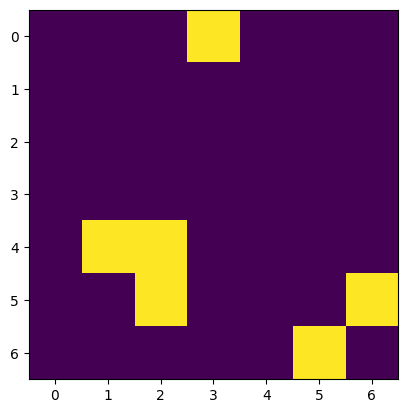

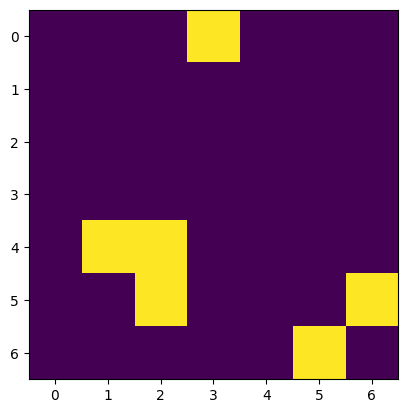

In [40]:
#define variable for sealevel
sealevel = 0 

new_topography = apply_sea_level(sealevel, topography)
plt.imshow(new_topography)
connected = find_underwater_states(new_topography)
plt.figure()
plt.imshow(connected)
